In [2]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import time
from sklearn.preprocessing import normalize
from scipy import signal
import skimage
import tifffile as tiff
import os
import math
import json
from skimage.measure import label
from skimage.measure import regionprops
from com import *

# sub function and class

## some selfmake-class

# load image path and sort

This code only deal with npy

In [4]:
#指定路徑(絕對路徑) 
#path = "/home/isis0517/Documents/data/compress/HMMTest_01/"
#savepath = "/home/isis0517/Documents/data/compress/HMMTest_01_com"
#path = "/home/isis0517/Documents/data/compress/1.m2w2-10nit-1.8cm/"
savepath = "/home/isis0517/Documents/data"
path = "/media/isis0517/Crucial X8/1124 bg30/16fish"

#if not os.path.isdir(savepath):
#    os.mkdir(savepath)

#if not os.path.isdir(os.path.join(savepath, "pos1")):
#    os.mkdir(os.path.join(savepath, "pos1"))
#if not os.path.isdir(os.path.join(savepath, "pos2")):
#    os.mkdir(os.path.join(savepath, "pos2"))
    
flist = os.listdir(path)
tiflist = []
for filename in flist:
    if os.path.isdir(filename):
        continue
    if filename.split(".")[-1] == "npy":
        tiflist.append(filename)

print('There is a total of ',len(tiflist), 'images')
frame_num = len(tiflist)
#for srt in os.listdir(path):
#flist.append(srt.split('_'))

#排序路徑
tiflist.sort(key = lambda x: int(x.split("_")[-1].split(".")[0]))

#變成絕對路徑
flist = []
for filename in tiflist:
    flist.append(os.path.join(path, filename))
    

There is a total of  9000 images


# generate background

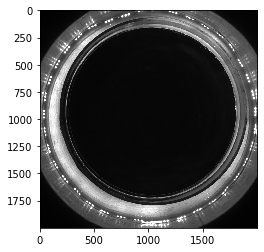

In [59]:
nbckgnd=500

tnum = np.random.randint(len(flist),size=nbckgnd)
tlist=[]
for s in tnum:
    tlist.append(flist[s])

img_shape = np.load(flist[0]).shape[0:2]
total = np.zeros(img_shape)
for file in tlist:
    b = np.load(file)
    total = total + b 
background = (total/nbckgnd).astype('uint8')
shape = img_shape
plt.imshow(background,cmap = plt.cm.gray)
plt.show()
#tiff.imwrite(os.path.join(savepath, "background.tiff"), back.cbackground)


# generate mask (no mask)

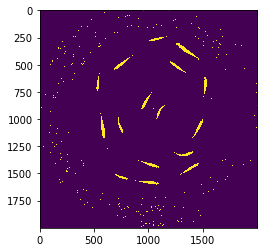

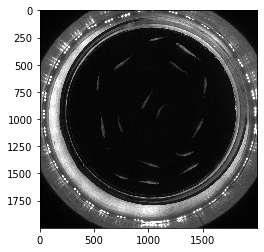

In [68]:
tnum = np.random.randint(len(flist),size=500)
tlist=[]
for s in tnum:
    tlist.append(flist[s])

img = np.load(tlist[3])
a = img
a = cv2.absdiff(a, background)

plt.imshow(a>15)
plt.show()
plt.imshow(img,cmap = plt.cm.gray)

# generate the ROI

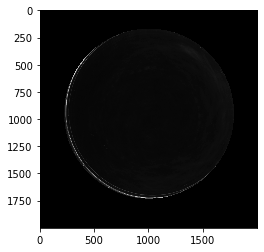

In [96]:
#test for find out the circle

mask = cv2.circle(np.zeros(background.shape).astype("uint8"), (1000,950), 780, 255, -1)>200
plt.imshow(mask*background ,cmap = plt.cm.gray)

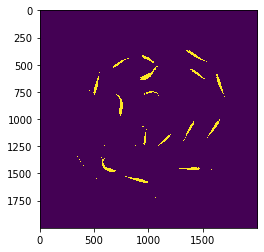

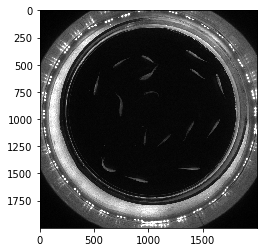

In [97]:
tnum = np.random.randint(len(flist),size=500)
tlist=[]
for s in tnum:
    tlist.append(flist[s])

img = np.load(flist[6354])
a = img
a = cv2.absdiff(a, background)

plt.imshow(a*mask>15)
plt.show()
plt.imshow(img,cmap = plt.cm.gray)

In [98]:

from multiprocessing import Process, Pool
from functools import partial

resize = (background.shape[1]//3,background.shape[0]//3)
pos1 = []
pos2 = []
video = cv2.VideoWriter(os.path.join(savepath, "16fish_30bg.avi"),cv2.VideoWriter_fourcc(*'XVID'), 
                        30, resize, isColor=False)
#video2 = cv2.VideoWriter(os.path.join(savepath, "video2.avi"), cv2.VideoWriter_fourcc(*'ASLC'), 30, (size*2+1,size*2+1))

start = time.time()
num = 0

def npy2resize(filename, resize = resize, background = background):
    
    a = np.load(filename)
    a = cv2.absdiff(a, background)
    a = a*mask>15
    img =(255*a).astype("uint8")
    
    return cv2.resize(src=img,dsize=resize)
    

with Pool() as pool:
    result = pool.map(npy2resize, flist)
    print(len(result))
    
    for img in result:
        num += 1
        if(num%100==0):
            print(num)

        video.write(img)
    del result
        
print(time.time()-start)
video.release()
#video2.release()

#config = {"size": size, "frame_num":frame_num, "version" : "alpha",
          #"date": time.strftime("%Y-%m-%d %H:%M", time.localtime()), "shape":background.shape[0:2], "thres":thres, "is_mono":is_mono}

#with open(os.path.join(savepath, "save.config"), 'w') as jsonfile:
    #json.dump(config, jsonfile, indent=4)

print("end")

9000
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800
4900
5000
5100
5200
5300
5400
5500
5600
5700
5800
5900
6000
6100
6200
6300
6400
6500
6600
6700
6800
6900
7000
7100
7200
7300
7400
7500
7600
7700
7800
7900
8000
8100
8200
8300
8400
8500
8600
8700
8800
8900
9000
128.92955207824707
end


# test for size optimizer

In [143]:
temp = np.load("/home/isis0517/Documents/data/session_1115_preprocess/trajectories/trajectories.npy", allow_pickle=True)
type(temp)
print(temp.__dir__())

['__repr__', '__hash__', '__str__', '__lt__', '__le__', '__eq__', '__ne__', '__gt__', '__ge__', '__iter__', '__add__', '__radd__', '__sub__', '__rsub__', '__mul__', '__rmul__', '__mod__', '__rmod__', '__divmod__', '__rdivmod__', '__pow__', '__rpow__', '__neg__', '__pos__', '__abs__', '__bool__', '__invert__', '__lshift__', '__rlshift__', '__rshift__', '__rrshift__', '__and__', '__rand__', '__xor__', '__rxor__', '__or__', '__ror__', '__int__', '__float__', '__iadd__', '__isub__', '__imul__', '__imod__', '__ipow__', '__ilshift__', '__irshift__', '__iand__', '__ixor__', '__ior__', '__floordiv__', '__rfloordiv__', '__truediv__', '__rtruediv__', '__ifloordiv__', '__itruediv__', '__index__', '__matmul__', '__rmatmul__', '__imatmul__', '__len__', '__getitem__', '__setitem__', '__delitem__', '__contains__', '__new__', '__array__', '__array_prepare__', '__array_wrap__', '__array_ufunc__', '__array_function__', '__sizeof__', '__copy__', '__deepcopy__', '__reduce__', '__reduce_ex__', '__setstate_

In [235]:
import pickle
import json
with open("/home/isis0517/Documents/data/session_1115_preprocess/trajectories/trajectories.pkl", 'rb') as f:
    data = pickle.load(f)

UnpicklingError: STACK_GLOBAL requires str

In [240]:
import io
test = np.load(io.BytesIO(open('/home/isis0517/Documents/data/session_1115_preprocess/trajectories/trajectories.pkl', 'rb').read()), allow_pickle=True)

In [252]:
test = test[()]

In [261]:
traject = np.array(test['trajectories'])
id_prob = np.array(test['id_probabilities'])

In [272]:
print(id_prob[800])
print(traject[800])

[[nan]
 [nan]]
[[nan nan]
 [nan nan]]


In [260]:
test.keys()

dict_keys(['trajectories', 'id_probabilities', 'git_commit', 'video_path', 'frames_per_second', 'body_length'])

In [27]:
import csv


with open('/home/isis0517/test.csv', newline='') as f:
    reader = csv.reader(f,delimiter=';')
    data = list(reader)

print(data[1])

poses1 = list()
poses2 = list()

def str2int(s):
    try:
        i = int(s)
    except:
        i = -1
    return i

for line in data[1:]:
    poses1.append((str2int(line[1]),str2int(line[2])))
    poses2.append((str2int(line[3]),str2int(line[4])))

['0', '509', '289', '348', '228', '']


In [34]:
for s in range(len(poses1)):
    pos = poses1[s]
    if pos[0]<0 or pos[1]<0:
        poses1[s] = poses2[s]

In [37]:
np.save("poses1.npy", poses1)
np.save("poses2.npy", poses2)